In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("theme_no_227.csv")
df.shape

(61, 30)

In [3]:
df.columns

Index(['종목명', '종목명.1', '현재가', '전일비', '등락률', '매수호가', '매도호가', '거래량', '거래대금',
       '전일거래량', '조회일자', '종목코드', '시가총액', '시가총액순위', '상장주식수', '액면가l매매단위',
       '외국인한도주식수(A)', '외국인보유주식수(B)', '외국인소진율(B/A)', '투자의견l목표주가', '52주최고l최저',
       'PERlEPS(2020.06)', '추정PERlEPS', 'PBRlBPS (2020.06)', '배당수익률l2019.12',
       '동일업종 PER', '동일업종 등락률', '배당수익률', 'PERlEPS(2019.12)',
       'PBRlBPS (2019.12)'],
      dtype='object')

## 데이터 전처리
###  데이터 타입 변경
* 시가총액 데이터 수치형태로 변경하기

In [4]:
df["시가총액(억원)"] = df["시가총액"].str.split("억원", expand=True)[0]
df[["시가총액", "시가총액(억원)", '시가총액순위']].head()

,시가총액,시가총액(억원),시가총액순위
0,"1,668 억원","1,668",코스닥 452위
1,"2,172 억원","2,172",코스닥 343위
2,"35조 6,826 억원","35조 6,826",코스피 7위
3,"18조 7,481 억원","18조 7,481",코스피 16위
4,"1,436 억원","1,436",코스피 601위


### 파생변수 만들기
* 코스피/코스닥 구분 만들기
* 시가총액 순위 분리하기
* 액면가l매매단위
* 52주최고l최저

In [5]:
df["코스피/코스닥"] = df['시가총액순위'].str.split(" ", expand=True)[0]
df["시가총액순위(전처리)"] = df['시가총액순위'].str.split(" ", expand=True)[1]
df[["시가총액", "시가총액(억원)", '시가총액순위', '코스피/코스닥', '시가총액순위(전처리)']].head()

,시가총액,시가총액(억원),시가총액순위,코스피/코스닥,시가총액순위(전처리)
0,"1,668 억원","1,668",코스닥 452위,코스닥,452위
1,"2,172 억원","2,172",코스닥 343위,코스닥,343위
2,"35조 6,826 억원","35조 6,826",코스피 7위,코스피,7위
3,"18조 7,481 억원","18조 7,481",코스피 16위,코스피,16위
4,"1,436 억원","1,436",코스피 601위,코스피,601위


In [6]:
df["액면가"] = df['액면가l매매단위'].str.split("  l  ", expand=True)[0]
df["매매단위"] = df['액면가l매매단위'].str.split("  l  ", expand=True)[1]
df["액면가"] = df["액면가"].str.replace("원", "")
df["액면가"] = df["액면가"].str.replace(",", "")

In [7]:
df["시가총액순위(전처리)"] = df["시가총액순위(전처리)"].str.replace("위", "").astype(int)

In [8]:
df["52주최고"] = df["52주최고l최저"].str.split("  l  ", expand=True)[0]
df["52주최저"] = df["52주최고l최저"].str.split("  l  ", expand=True)[1]

In [9]:
df["52주최고(int)"] = df["52주최고"].str.replace(",", "").astype(int)
df["52주최저(int)"] = df["52주최저"].str.replace(",", "").astype(int)

df["52주차액"] = df["52주최고(int)"] - df["52주최저(int)"]
df["52주차액비율"] = df["52주최고(int)"] / df["52주최저(int)"]

df["현재-최고가"] = df["현재가"] - df["52주최고(int)"]
df["현재/최고가비율"] =  df["현재가"] / df["52주최고(int)"] 

In [10]:
cols = ['종목명', '현재가','코스피/코스닥', "52주최고(int)", "52주최저(int)", 
    "52주차액", "52주차액비율", "현재-최고가", "현재/최고가비율", "동일업종 PER", "동일업종 등락률", "배당수익률"]

In [11]:
df[cols].sort_values(
    "52주차액비율", ascending=False).head(30)

,종목명,현재가,코스피/코스닥,52주최고(int),52주최저(int),52주차액,52주차액비율,현재-최고가,현재/최고가비율,동일업종 PER,동일업종 등락률,배당수익률
18,상아프론테크 *,36500.0,코스닥,55100,7410,47690,7.435897,-18600.0,0.662432,125.16배,-1.56%,NaN
0,나라엠앤디 *,11750.0,코스닥,14000,1900,12100,7.368421,-2250.0,0.839286,-22.54배,0.00%,NaN
44,인지컨트롤스,10300.0,코스피,15750,2145,13605,7.342657,-5450.0,0.653968,28.92배,+0.49%,NaN
16,세원 *,4290.0,코스닥,8570,1230,7340,6.967480,-4280.0,0.500583,28.92배,+0.49%,NaN
60,KEC,1905.0,코스피,2985,475,2510,6.284211,-1080.0,0.638191,17.95배,+0.09%,NaN
50,센트랄모텍,19500.0,코스피,46750,7500,39250,6.233333,-27250.0,0.417112,28.92배,+0.49%,NaN
24,에스모 *,407.0,코스닥,2170,360,1810,6.027778,-1763.0,0.187558,28.92배,+0.49%,NaN
28,우수AMS *,10450.0,코스닥,10800,1970,8830,5.482234,-350.0,0.967593,28.92배,+0.49%,NaN
11,동아화성 *,10400.0,코스닥,12500,2425,10075,5.154639,-2100.0,0.832000,28.92배,+0.49%,NaN
13,영화테크 *,18100.0,코스닥,24500,4900,19600,5.000000,-6400.0,0.738776,28.92배,+0.49%,NaN


### 서브셋 만들기
* 서브셋 만들기
* 정렬하기

In [12]:
코스피 = df[df["코스피/코스닥"] == "코스피"].sort_values("시가총액순위(전처리)")
코스피[cols].head(20)

,종목명,현재가,코스피/코스닥,52주최고(int),52주최저(int),52주차액,52주차액비율,현재-최고가,현재/최고가비율,동일업종 PER,동일업종 등락률,배당수익률
8,LG화학,650000.0,코스피,785000,230000,555000,3.413043,-135000.0,0.828025,58.15배,+1.07%,NaN
2,현대차,167000.0,코스피,191500,65000,126500,2.946154,-24500.0,0.872063,22.12배,+2.51%,NaN
38,삼성SDI,424500.0,코스피,509000,180000,329000,2.827778,-84500.0,0.833988,125.16배,-1.56%,NaN
20,현대모비스,234500.0,코스피,268500,126000,142500,2.130952,-34000.0,0.873371,28.92배,+0.49%,NaN
3,기아차,46250.0,코스피,51500,21500,30000,2.395349,-5250.0,0.898058,22.12배,+2.51%,NaN
27,SK이노베이션,136500.0,코스피,197500,55100,142400,3.584392,-61000.0,0.691139,-8.85배,+0.18%,NaN
36,한온시스템,12000.0,코스피,14150,8100,6050,1.746914,-2150.0,0.848057,28.92배,+0.49%,NaN
29,SKC,73700.0,코스피,104500,27700,76800,3.772563,-30800.0,0.705263,58.15배,+1.07%,NaN
25,LS ELECTRIC,54000.0,코스피,79200,25550,53650,3.099804,-25200.0,0.681818,-71.11배,-0.33%,NaN
5,만도,34400.0,코스피,39550,16200,23350,2.441358,-5150.0,0.869785,28.92배,+0.49%,NaN


In [13]:
코스피[cols].sort_values("현재-최고가", ascending=True).head(20)

,종목명,현재가,코스피/코스닥,52주최고(int),52주최저(int),52주차액,52주차액비율,현재-최고가,현재/최고가비율,동일업종 PER,동일업종 등락률,배당수익률
8,LG화학,650000.0,코스피,785000,230000,555000,3.413043,-135000.0,0.828025,58.15배,+1.07%,NaN
38,삼성SDI,424500.0,코스피,509000,180000,329000,2.827778,-84500.0,0.833988,125.16배,-1.56%,NaN
27,SK이노베이션,136500.0,코스피,197500,55100,142400,3.584392,-61000.0,0.691139,-8.85배,+0.18%,NaN
20,현대모비스,234500.0,코스피,268500,126000,142500,2.130952,-34000.0,0.873371,28.92배,+0.49%,NaN
29,SKC,73700.0,코스피,104500,27700,76800,3.772563,-30800.0,0.705263,58.15배,+1.07%,NaN
50,센트랄모텍,19500.0,코스피,46750,7500,39250,6.233333,-27250.0,0.417112,28.92배,+0.49%,NaN
25,LS ELECTRIC,54000.0,코스피,79200,25550,53650,3.099804,-25200.0,0.681818,-71.11배,-0.33%,NaN
2,현대차,167000.0,코스피,191500,65000,126500,2.946154,-24500.0,0.872063,22.12배,+2.51%,NaN
52,삼화콘덴서,52200.0,코스피,69900,33000,36900,2.118182,-17700.0,0.746781,125.16배,-1.56%,NaN
41,두산솔루스,33350.0,코스피,50200,13650,36550,3.677656,-16850.0,0.664343,45.85배,+0.49%,NaN


In [14]:
kospi_corr = 코스피.corr().dropna(how="all", axis=0).dropna(how="all", axis=1)
kospi_corr

,현재가,전일비,매수호가,매도호가,거래량,거래대금,전일거래량,종목코드,상장주식수,외국인한도주식수(A),외국인보유주식수(B),시가총액순위(전처리),52주최고(int),52주최저(int),52주차액,52주차액비율,현재-최고가,현재/최고가비율
현재가,1.000000,0.917106,1.000000,0.999999,-0.102952,0.687516,-0.112810,-0.121111,0.021660,0.021660,0.144763,-0.503980,0.998472,0.987478,0.992281,-0.129458,-0.947940,0.279206
전일비,0.917106,1.000000,0.916933,0.916920,-0.045331,0.803640,-0.068593,-0.080845,0.075781,0.075781,0.181897,-0.399847,0.911137,0.863474,0.923197,-0.078877,-0.843046,0.263906
매수호가,1.000000,0.916933,1.000000,1.000000,-0.102994,0.687460,-0.112861,-0.121190,0.021670,0.021670,0.144846,-0.504181,0.998465,0.987578,0.992224,-0.129579,-0.947904,0.279342
매도호가,0.999999,0.916920,1.000000,1.000000,-0.103023,0.687669,-0.112904,-0.121226,0.021727,0.021727,0.144901,-0.504305,0.998472,0.987590,0.992228,-0.129617,-0.947945,0.279357
거래량,-0.102952,-0.045331,-0.102994,-0.103023,1.000000,0.080817,0.996232,0.048834,0.134322,0.134322,0.006066,0.027370,-0.108347,-0.113706,-0.104592,0.426525,0.129587,-0.171829
거래대금,0.687516,0.803640,0.687460,0.687669,0.080817,1.000000,0.023385,-0.161629,0.279234,0.279234,0.395901,-0.456434,0.673989,0.657215,0.674212,-0.086488,-0.579840,0.325815
전일거래량,-0.112810,-0.068593,-0.112861,-0.112904,0.996232,0.023385,1.000000,0.066706,0.082156,0.082156,-0.060401,0.061185,-0.116634,-0.123575,-0.112040,0.437259,0.129967,-0.203229
종목코드,-0.121111,-0.080845,-0.121190,-0.121226,0.048834,-0.161629,0.066706,1.000000,-0.181358,-0.181358,-0.230274,-0.021788,-0.098859,-0.144065,-0.076458,0.319785,-0.012340,-0.513669
상장주식수,0.021660,0.075781,0.021670,0.021727,0.134322,0.279234,0.082156,-0.181358,1.000000,1.000000,0.926787,-0.429209,0.009995,0.031883,-0.000420,-0.276366,0.046488,0.330278
외국인한도주식수(A),0.021660,0.075781,0.021670,0.021727,0.134322,0.279234,0.082156,-0.181358,1.000000,1.000000,0.926787,-0.429209,0.009995,0.031883,-0.000420,-0.276366,0.046488,0.330278


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font="AppleGothic", rc={"axes.unicode_minus":False})

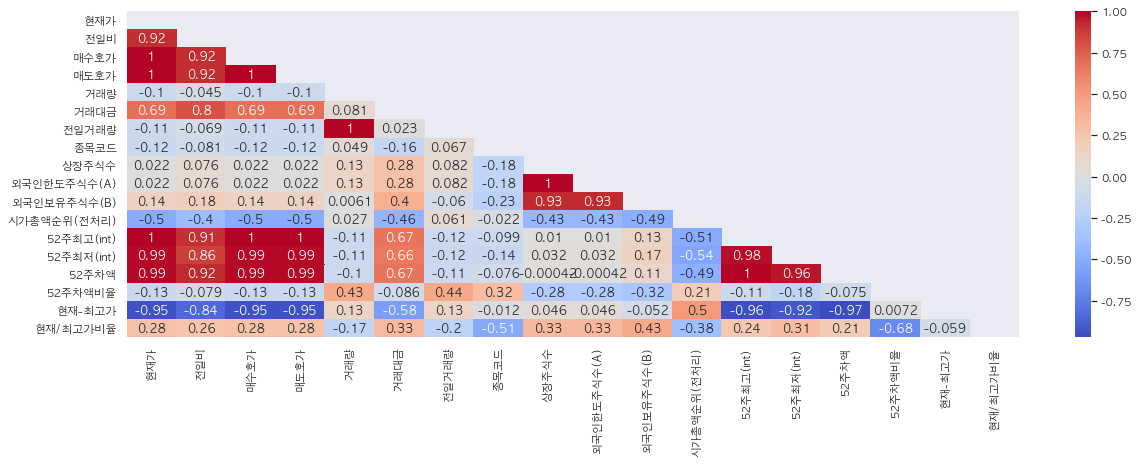

In [16]:
mask = np.triu(np.ones_like(kospi_corr, dtype=bool))
plt.figure(figsize=(20, 6))
sns.heatmap(kospi_corr, cmap="coolwarm", annot=True, mask=mask)

In [17]:
num_desc = 코스피.set_index("종목명").describe()
num_cols = num_desc.columns.tolist()
num_cols.append("종목명")

In [18]:
item_corr = 코스피[num_cols].set_index("종목명").T.corr()

In [19]:
item_corr["삼성SDI"].sort_values()

종목명
KEC            0.884353
센트랄모텍          0.953778
디아이씨           0.957439
코스모신소재         0.958652
인지컨트롤스         0.961965
성문전자           0.961967
계양전기           0.962130
삼화전자           0.969712
두산솔루스          0.969726
SKC            0.971016
삼화콘덴서          0.975376
LS ELECTRIC    0.979322
한온시스템          0.988435
만도             0.988961
삼화전기           0.991268
SK이노베이션        0.991520
S&T모티브         0.992107
한국단자           0.992322
지엠비코리아         0.995333
현대차            0.996951
LG화학           0.999649
기아차            0.999668
현대모비스          0.999945
삼성SDI          1.000000
Name: 삼성SDI, dtype: float64